In [1]:
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import statistics as st

In [3]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [3]:
import seaborn as sns

In [4]:
df = sns.load_dataset("tips")

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
np.mean(df["total_bill"])

19.78594262295082

In [8]:
np.median(df["total_bill"])

17.795

In [21]:
st.mode(df["total_bill"])

13.42

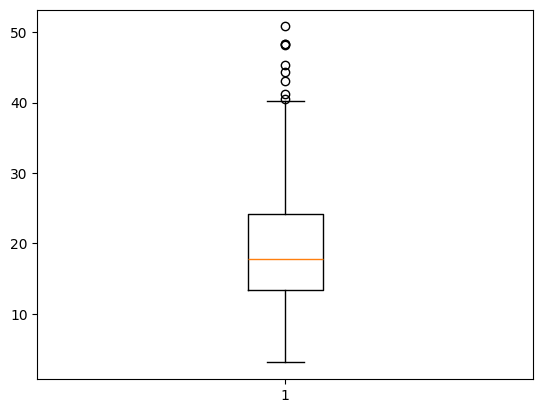

In [18]:
plt.boxplot(df['total_bill'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x233bdbfe890>,
 'caps': [<matplotlib.lines.Line2D at 0x233bdbfed70>,
 'boxes': [<matplotlib.lines.Line2D at 0x233bdbfe590>],
 'medians': [<matplotlib.lines.Line2D at 0x233bdbff370>],
 'fliers': [<matplotlib.lines.Line2D at 0x233bdbff5b0>],
 'means': []}

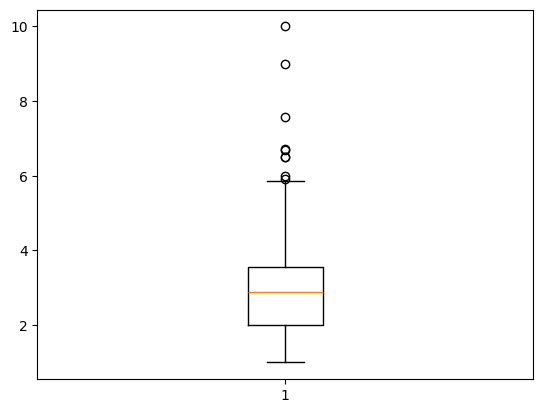

In [23]:
plt.boxplot(df['tip'])  #### dots you see here as some outliers

<Axes: xlabel='total_bill', ylabel='Count'>

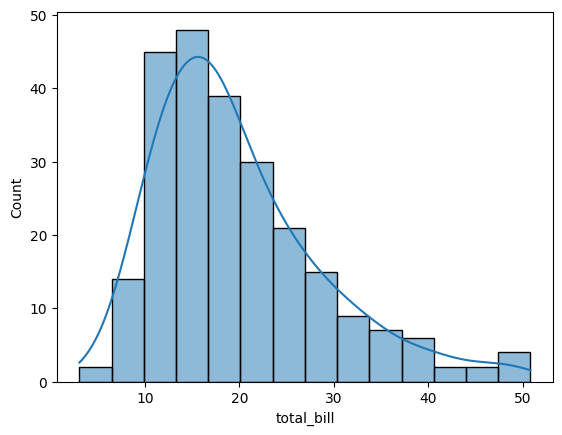

In [27]:
sns.histplot(df['total_bill'],kde = True)

In [9]:
df1 = sns.load_dataset("iris")

In [10]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
df1['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

<Axes: xlabel='sepal_width', ylabel='Count'>

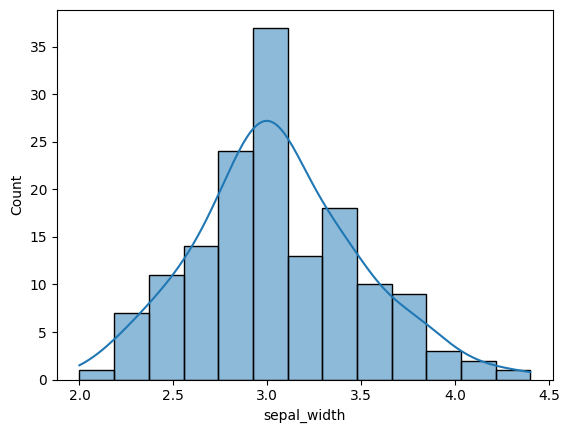

In [30]:
sns.histplot(df1['sepal_width'],kde = True)

<Axes: ylabel='sepal_width'>

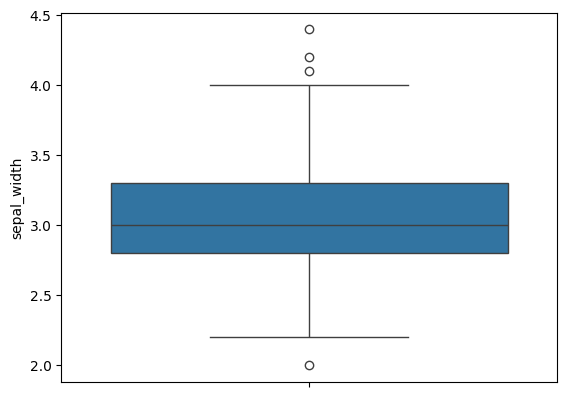

In [31]:
sns.boxplot(df1['sepal_width'])

### Five(5) Number Summary
* Minimum
* first Quaritle
* Median
* Third Quartile
* Maximum

In [32]:
np.mean(df1['sepal_width'])

3.0573333333333337

In [33]:
np.median(df1['sepal_width'])

3.0

In [34]:
st.mode(df1['sepal_width'])

3.0

In [37]:
np.percentile(df1['sepal_width'],[25,75])

array([2.8, 3.3])

### finding outliers with help of Z-Score

zscore = xi- mean / SD

In [5]:
data = df["total_bill"]

In [7]:
data

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [6]:
def outliers(data):
    mean = np.mean(data)
    threshold = 3
    sd = st.stdev(data)
    out = []
    for i in data:
        zscore= (i-mean)/sd
        if np.abs(zscore)>threshold:
            out.append(i)
    return out



In [9]:
outliers(data) ### these values are greater than the 3rd standard deviation

[48.27, 48.17, 50.81, 48.33]

### IQR

Following steps to find IQR

* Sort
* first quartile (Q1)
* Third Quartile (Q3)
* IQR = Q3-Q1
* lower Fence = Q1-1.5(IQR)
* Upper Fence = Q3 + 1.5(IQR)

In [14]:
def IQR(data):
    data = data.sort_values().reset_index(drop=True)
    q1,q3 = np.percentile(data,[25,75])
    iqr = q3-q1
    lF = q1 - (1.5*iqr)
    uF = q3 + (1.5*iqr)
    out = []
    for i in data:
        if i>lF and i<uF:
            continue
        else:
            out.append(i)

    return out


In [15]:
IQR(data)

[40.55, 41.19, 43.11, 44.3, 45.35, 48.17, 48.27, 48.33, 50.81]